In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xmltodict
import numpy as np
import requests
import os
import time
from mutagen.mp3 import MP3

In [2]:
url = 'http://www.yrad.com/cs/feed.xml'
fname = 'conspiracy_skeptic_feed.xml'

In [3]:
if not(os.path.isfile(fname)):
    print 'fetching'
    r = requests.get(url)
    f = open(fname, 'w')
    f.write(r.text)
    f.close()

with open(fname) as fd:
    xml = xmltodict.parse(fd.read())

In [4]:
# Download episodes that don't have the length in the feed

episodes = xml['rss']['channel']['item']
for episode in episodes:
    enclosure = episode['enclosure']
    mp3url = enclosure['@url']
    mp3file = mp3url[(mp3url.rfind('/')+1):len(mp3url)]
    mp3file = 'mp3s/' + mp3file
    if not(os.path.isfile(mp3file)):
        print 'Getting ' + mp3url
        r = requests.get(mp3url)
        f = open(mp3file, 'wb')
        f.write(r.content)
        time.sleep(10)
        length = -1

In [5]:
titles = []
lengths = []
episodes = xml['rss']['channel']['item']
for episode in episodes:
    enclosure = episode['enclosure']
    mp3url = enclosure['@url']
    mp3file = mp3url[(mp3url.rfind('/')+1):len(mp3url)]
    mp3file = 'mp3s/' + mp3file
    mp3 = MP3(mp3file)
    if mp3.has_key('TLEN'):
        length = int(mp3['TLEN'].text[0])
    else:
        length = -1
    titles.append(episode['title'])
    lengths.append(length)

In [6]:
mp3

{'TCON': TCON(encoding=0, text=[u'podcast']), 'TRCK': TRCK(encoding=0, text=[u'1']), 'TLEN': TLEN(encoding=0, text=[u'000001311712']), 'TPE1': TPE1(encoding=0, text=[u'The HiveMindGroup']), 'TALB': TALB(encoding=0, text=[u'The Conspiracy Skeptic'])}

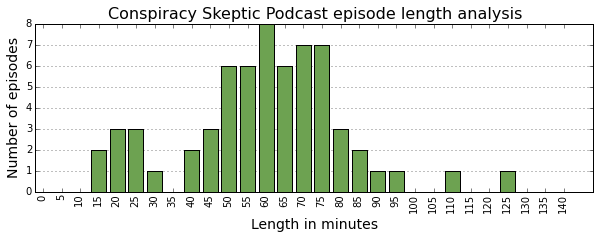

In [15]:
bins = np.arange(30) * 5
minutes = map(lambda x: 1.0 * x/1000/60, lengths)
h = np.histogram(minutes, bins=bins)
x = np.arange(len(h[0]))
lbls = h[1][0:len(h[0])]

plt.figure(figsize=(10,3))
plt.bar(x, h[0], color='#6da251', zorder=3)
plt.xticks(x + 0.4, lbls, rotation=90)
plt.ylabel('Number of episodes', fontsize=14)
plt.xlabel('Length in minutes', fontsize=14)
plt.gca().yaxis.grid(True, zorder=0)
plt.title('Conspiracy Skeptic Podcast episode length analysis', fontsize=16)
plt.savefig('karl.png',bbox_inches='tight')
plt.show()